In [195]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
#La classe By est utilisée pour localiser des éléments dans un document.
from  selenium.webdriver.common.by import By
from time import sleep


In [196]:
import pandas as pd

In [197]:
driver=webdriver.Chrome()


In [198]:
url="https://twitter.com/login"
driver.get(url)


In [199]:
username=driver.find_element(By.XPATH,"//input[@name='text']")
username.send_keys("@votre_user_name")#user name

In [200]:
btn=driver.find_element(By.XPATH,'//span[contains(text(),"Suivant")]')
btn.click()

In [203]:
pwd=driver.find_element(By.XPATH,'//input[@name="password"]')
pwd.send_keys("ecrire ici votre pawword ")#votre password

In [204]:
btn_login=driver.find_element(By.XPATH,'//span[contains(text(),"Se connecter")]')
btn_login.click()


In [ ]:

sleep(3)
search_box=driver.find_element(By.XPATH,'//input[@data-testid="SearchBox_Search_Input"]')
search_box.send_keys("#Covid") #mettre le mot a chercher 
search_box.send_keys(Keys.RETURN)

In [14]:
driver.find_element(By.LINK_TEXT,"Top").click()

In [16]:
# Attendre que les résultats de la recherche soient chargés
sleep(5)

UserTags=[]
Tweets=[]
Likes=[]
tweet_ids = set()

# Récupérer tous les tweets contenant le hashtag
articles = driver.find_elements(By.XPATH,"//article[@data-testid='tweet']")

while len(Tweets) < 400:
    # Parcourir tous les tweets et récupérer les informations
    for article in articles:
        # Récupérer le nom d'utilisateur
        UserTag = article.find_element(By.XPATH,".//div[@class='css-1dbjc4n r-1awozwy r-18u37iz r-1wbh5a2 r-dnmrzs']//span").text
        UserTags.append(UserTag)
         # Récupérer  le texte du tweet
        Tweet = article.find_element(By.XPATH,".//div[@data-testid='tweetText']").text
        Tweets.append(Tweet)
        # Récupérerle   nombre de likes
        Like = article.find_element(By.XPATH,".//div[@data-testid='like']//span").text
        Likes.append(Like)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    articles = driver.find_elements(By.XPATH,"//article[@data-testid='tweet']")
    


print(len(UserTags),len(Tweets),len(Likes))

104 104 104


In [18]:
import pandas as pd 
df = pd.DataFrame(zip(UserTags,Tweets,Likes),columns=['UserTags','Tweets','Likes'])
df.duplicated().sum()

0

In [19]:
df.head(14)

,UserTags,Tweets,Likes
0,NinnyD Waiting~4~the Revolution,'Where has the old Daddy gone?': Father who su...,70
1,Kevin - WE THE PEOPLE - DAD -,The daughter of Jacob Rothschild -> Jacinda A...,507
2,Johny,Modi once again insulted India abroad\n\n#vacc...,19
3,Esther Hopkins,The brain can age between ‘one and ten years’ ...,"2,115"
4,NinnyD Waiting~4~the Revolution,10 year old stroke victim eleven days after 1 ...,122
5,Scary Election Denier,Watch what the Vaccines do to the Blood- if th...,32
6,Dave Webb - heart transplant recipient,3 years ago I was very unwell in hospital with...,34
7,sandip sabharwal,#Covid is like a normal viral flu now\nNo of p...,187
8,COVID Safe Maryland,CovidSafeMD member \n@rosagreenberg\n writes ...,26
9,Mr Pål Christiansen,Experts at St George's Hospital find masks mad...,32


In [ ]:
df.to_csv("twitter_covid.csv",index=False,encoding="utf-8")

In [48]:
tweet_data=pd.read_csv("twitter_covid.csv")

verification des valeur null
duplicated
dtypes
info()


In [49]:
tweet_data.dtypes

UserTags    object
Tweets      object
Likes       object
dtype: object

In [50]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UserTags  104 non-null    object
 1   Tweets    104 non-null    object
 2   Likes     103 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [51]:
tweet_data.isna().sum()

UserTags    0
Tweets      0
Likes       1
dtype: int64

In [52]:
tweet_data.duplicated().sum()

0

### pré-traitement
<h1>To do tasks <span class="tocSkip"></span></h1>
    <li> Lower casing
    <li> Punctuation removal
    <li> Identifying and Remove Stop Words
    <li> Tokenize Text in Words
    <li> NLTK Word Stemming
    <li> Build a bag-of-words
    <li> Create Term Frequency-Inverse Document Frequency (TF-IDF)
    <li> Bag of words

In [53]:
tweet_data["Tweets"]

0      'Where has the old Daddy gone?': Father who su...
1       The daughter of Jacob Rothschild -> Jacinda A...
2      Modi once again insulted India abroad\n\n#vacc...
3      The brain can age between ‘one and ten years’ ...
4      10 year old stroke victim eleven days after 1 ...
                             ...                        
99     It is inexcusable that the Australian governme...
100    We knew this in late 2022. But not covered muc...
101    Air pollution Can Affect Your #Covid Vaccine E...
102    With a 2020 #Covid infection causing a damaged...
103    Livestream 8pm April 2, 2023 #jan6 #jan6th #ha...
Name: Tweets, Length: 104, dtype: object

In [54]:

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize



### Lower casing

In [55]:
tweet_data["Tweets"] = tweet_data["Tweets"].apply(lambda x: x.lower())
  

### Remove punctuation

In [56]:
tweet_data.Tweets[0]

"'where has the old daddy gone?': father who suffered rare reaction to covid jab launches lawsuit\n#vvictims #studdendeath #diedsuddenly\n#covid #mrna #mrnavaccines #covid19 #vaccineinjury #vaccineinjuries #vaccinedeaths #vaccinedeath #plandemic\n#stoptheshots"

In [57]:
#list of all punctuations
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [58]:
# Convert list of punctuation characters to a string
punctuations_str = ''.join(punctuations)

# Remove punctuation from review column
tweet_data["Tweets"] = tweet_data["Tweets"].str.replace(f'[{punctuations_str}]', '')

In [59]:
tweet_data.Tweets[0]

'where has the old daddy gone father who suffered rare reaction to covid jab launches lawsuit\nvvictims studdendeath diedsuddenly\ncovid mrna mrnavaccines covid19 vaccineinjury vaccineinjuries vaccinedeaths vaccinedeath plandemic\nstoptheshots'

### delete all number 

In [60]:
import re
tweet_data["Tweets"] = tweet_data["Tweets"].apply(lambda x: re.sub(r'\d+','',x))


### remove stopwords
les stop words (mots très fréquents mais peu informatifs tels que "le", "la", "de", etc.)

In [61]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
stop = stopwords.words('english')

In [63]:

#function for remove stopwords
def remove_stopwords(Tweet):
    return " ".join([word for word in str(Tweet).split() if word not in stop])


tweet_data['Tweets'] = tweet_data['Tweets'].apply(lambda x: remove_stopwords(x))


In [64]:
tweet_data['Tweets']

0      old daddy gone father suffered rare reaction c...
1      daughter jacob rothschild jacinda ardern respo...
2      modi insulted india abroad vaccine covid modi ...
3      brain age ‘one ten years’ covid infection aver...
4      year old stroke victim eleven days shot pfizer...
                             ...                        
99     inexcusable australian government still advert...
100    knew late covered much media covid skyrockets ...
101          air pollution affect covid vaccine efficacy
102    covid infection causing damaged heart valve he...
103    livestream pm april jan janth halthospitalhomi...
Name: Tweets, Length: 104, dtype: object

### tokenization

In [65]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simens\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
#Tokenize Text in Words(division de texte en unité discréte appelés tokens (mot,phrase,nbr))
tweet_data['word_tokenize'] = tweet_data['Tweets'].apply(lambda x: word_tokenize(x))
  

In [67]:
tweet_data

,UserTags,Tweets,Likes,word_tokenize
0,NinnyD Waiting~4~the Revolution,old daddy gone father suffered rare reaction c...,70,"[old, daddy, gone, father, suffered, rare, rea..."
1,Kevin - WE THE PEOPLE - DAD -,daughter jacob rothschild jacinda ardern respo...,507,"[daughter, jacob, rothschild, jacinda, ardern,..."
2,Johny,modi insulted india abroad vaccine covid modi ...,19,"[modi, insulted, india, abroad, vaccine, covid..."
3,Esther Hopkins,brain age ‘one ten years’ covid infection aver...,"2,115","[brain, age, ‘, one, ten, years, ’, covid, inf..."
4,NinnyD Waiting~4~the Revolution,year old stroke victim eleven days shot pfizer...,122,"[year, old, stroke, victim, eleven, days, shot..."
...,...,...,...,...
99,Bernardi,inexcusable australian government still advert...,385,"[inexcusable, australian, government, still, a..."
100,Raina MacIntyre,knew late covered much media covid skyrockets ...,918,"[knew, late, covered, much, media, covid, skyr..."
101,TIMES NOW,air pollution affect covid vaccine efficacy,5,"[air, pollution, affect, covid, vaccine, effic..."
102,Dame Sa 3.5%,covid infection causing damaged heart valve he...,39,"[covid, infection, causing, damaged, heart, va..."


### lematization

In [68]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\simens\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
# Initialiser le lemmatiseur
lemmatizer = WordNetLemmatizer()
# Lemmatisation de chaque mot
tweet_data['word_tokenize'] = tweet_data['word_tokenize'].apply(lambda row : [lemmatizer.lemmatize(token) for token in row])


In [70]:
tweet_data

,UserTags,Tweets,Likes,word_tokenize
0,NinnyD Waiting~4~the Revolution,old daddy gone father suffered rare reaction c...,70,"[old, daddy, gone, father, suffered, rare, rea..."
1,Kevin - WE THE PEOPLE - DAD -,daughter jacob rothschild jacinda ardern respo...,507,"[daughter, jacob, rothschild, jacinda, ardern,..."
2,Johny,modi insulted india abroad vaccine covid modi ...,19,"[modi, insulted, india, abroad, vaccine, covid..."
3,Esther Hopkins,brain age ‘one ten years’ covid infection aver...,"2,115","[brain, age, ‘, one, ten, year, ’, covid, infe..."
4,NinnyD Waiting~4~the Revolution,year old stroke victim eleven days shot pfizer...,122,"[year, old, stroke, victim, eleven, day, shot,..."
...,...,...,...,...
99,Bernardi,inexcusable australian government still advert...,385,"[inexcusable, australian, government, still, a..."
100,Raina MacIntyre,knew late covered much media covid skyrockets ...,918,"[knew, late, covered, much, medium, covid, sky..."
101,TIMES NOW,air pollution affect covid vaccine efficacy,5,"[air, pollution, affect, covid, vaccine, effic..."
102,Dame Sa 3.5%,covid infection causing damaged heart valve he...,39,"[covid, infection, causing, damaged, heart, va..."


In [73]:
tweet_data['word_tokenized'] = tweet_data['word_tokenize'].apply(lambda x: " ".join(x))


In [74]:
tweet_data

,UserTags,Tweets,Likes,word_tokenize,word_tokenized
0,NinnyD Waiting~4~the Revolution,old daddy gone father suffered rare reaction c...,70,"[old, daddy, gone, father, suffered, rare, rea...",old daddy gone father suffered rare reaction c...
1,Kevin - WE THE PEOPLE - DAD -,daughter jacob rothschild jacinda ardern respo...,507,"[daughter, jacob, rothschild, jacinda, ardern,...",daughter jacob rothschild jacinda ardern respo...
2,Johny,modi insulted india abroad vaccine covid modi ...,19,"[modi, insulted, india, abroad, vaccine, covid...",modi insulted india abroad vaccine covid modi ...
3,Esther Hopkins,brain age ‘one ten years’ covid infection aver...,"2,115","[brain, age, ‘, one, ten, year, ’, covid, infe...",brain age ‘ one ten year ’ covid infection ave...
4,NinnyD Waiting~4~the Revolution,year old stroke victim eleven days shot pfizer...,122,"[year, old, stroke, victim, eleven, day, shot,...",year old stroke victim eleven day shot pfizer ...
...,...,...,...,...,...
99,Bernardi,inexcusable australian government still advert...,385,"[inexcusable, australian, government, still, a...",inexcusable australian government still advert...
100,Raina MacIntyre,knew late covered much media covid skyrockets ...,918,"[knew, late, covered, much, medium, covid, sky...",knew late covered much medium covid skyrocket ...
101,TIMES NOW,air pollution affect covid vaccine efficacy,5,"[air, pollution, affect, covid, vaccine, effic...",air pollution affect covid vaccine efficacy
102,Dame Sa 3.5%,covid infection causing damaged heart valve he...,39,"[covid, infection, causing, damaged, heart, va...",covid infection causing damaged heart valve he...


(-0.5, 799.5, 599.5, -0.5)

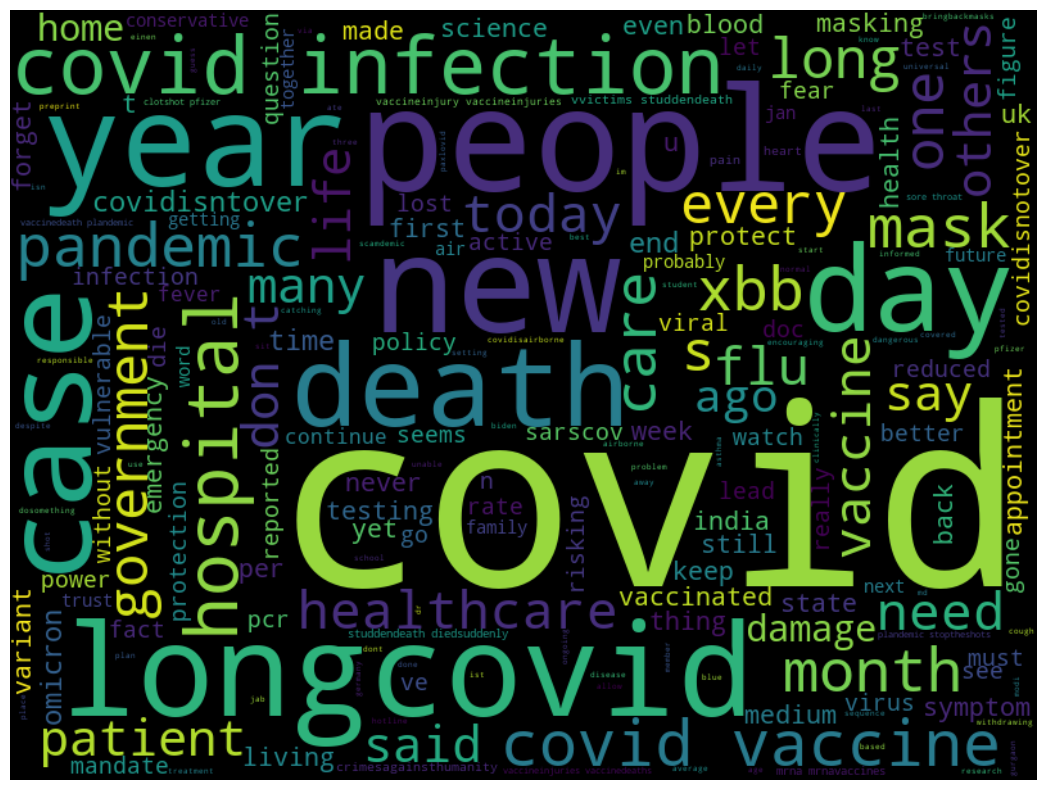

In [75]:
import matplotlib
import pylab as plt

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=600).generate(" ".join(tweet_data['word_tokenized']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [43]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\simens\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\simens\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\simens\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\simens\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\simens\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammar

False

#### POS Tagging

In [76]:
tweet_data['pos_tags'] = tweet_data['word_tokenize'].apply(lambda x: nltk.pos_tag(x))

In [87]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

In [84]:
# Convert between the PennTreebank tags to simple Wordnet tags
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [85]:
# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV,wn.VERB):
        return []
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []
    # Trouver les synsets associés au mot dans SentiWordNet
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [89]:
# Calculer le score de polarité total pour le tweet
def sentiment(senti_val):
    pos=neg=obj=0
    for i in range(len(senti_val)):
        try:
            pos = pos + senti_val[i][1]
            neg = neg + senti_val[i][2]
            obj = obj + senti_val[i][3]
        
        except:
            continue
    return pos - neg

In [90]:
score = []
for data in tweet_data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in data]
    score.append(sentiment(senti_val))

In [92]:
tweet_data['score']=score

In [93]:
tweet_data

,UserTags,Tweets,Likes,word_tokenize,word_tokenized,pos_tags,score
0,NinnyD Waiting~4~the Revolution,old daddy gone father suffered rare reaction c...,70,"[old, daddy, gone, father, suffered, rare, rea...",old daddy gone father suffered rare reaction c...,"[(old, JJ), (daddy, NN), (gone, VBN), (father,...",0.875
1,Kevin - WE THE PEOPLE - DAD -,daughter jacob rothschild jacinda ardern respo...,507,"[daughter, jacob, rothschild, jacinda, ardern,...",daughter jacob rothschild jacinda ardern respo...,"[(daughter, NN), (jacob, NN), (rothschild, NN)...",0.875
2,Johny,modi insulted india abroad vaccine covid modi ...,19,"[modi, insulted, india, abroad, vaccine, covid...",modi insulted india abroad vaccine covid modi ...,"[(modi, NN), (insulted, VBD), (india, JJ), (ab...",0.000
3,Esther Hopkins,brain age ‘one ten years’ covid infection aver...,"2,115","[brain, age, ‘, one, ten, year, ’, covid, infe...",brain age ‘ one ten year ’ covid infection ave...,"[(brain, NN), (age, NN), (‘, VBD), (one, CD), ...",0.000
4,NinnyD Waiting~4~the Revolution,year old stroke victim eleven days shot pfizer...,122,"[year, old, stroke, victim, eleven, day, shot,...",year old stroke victim eleven day shot pfizer ...,"[(year, NN), (old, JJ), (stroke, NN), (victim,...",0.375
...,...,...,...,...,...,...,...
99,Bernardi,inexcusable australian government still advert...,385,"[inexcusable, australian, government, still, a...",inexcusable australian government still advert...,"[(inexcusable, JJ), (australian, JJ), (governm...",-1.000
100,Raina MacIntyre,knew late covered much media covid skyrockets ...,918,"[knew, late, covered, much, medium, covid, sky...",knew late covered much medium covid skyrocket ...,"[(knew, NN), (late, RB), (covered, VBD), (much...",-0.125
101,TIMES NOW,air pollution affect covid vaccine efficacy,5,"[air, pollution, affect, covid, vaccine, effic...",air pollution affect covid vaccine efficacy,"[(air, NN), (pollution, NN), (affect, NN), (co...",0.125
102,Dame Sa 3.5%,covid infection causing damaged heart valve he...,39,"[covid, infection, causing, damaged, heart, va...",covid infection causing damaged heart valve he...,"[(covid, JJ), (infection, NN), (causing, VBG),...",-2.375


In [104]:
# Classer le tweet en fonction du score de polarité
for i in range(len(tweet_data)):
    score = tweet_data.score[i]
    if score > 0:
        tweet_data.loc[i, 'categorie'] = "positif"
    elif score < 0:
        tweet_data.loc[i, 'categorie'] = "negatif"
    else:
        tweet_data.loc[i, 'categorie'] = "neutre"


### visualisation des tweets

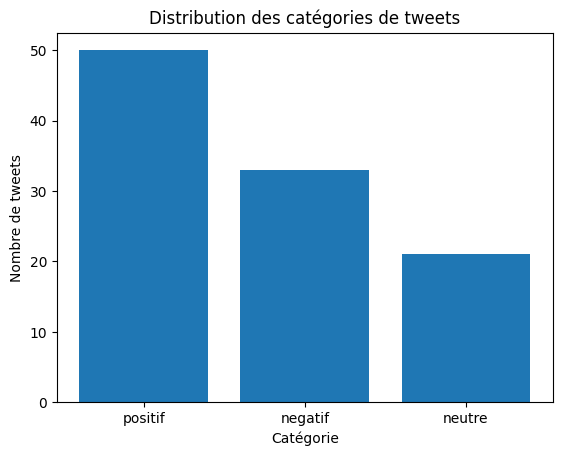

In [141]:
import matplotlib.pyplot as plt

categories = tweet_data['categorie'].value_counts()

plt.bar(categories.index, categories.values)
plt.title('Distribution des catégories de tweets')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de tweets')
plt.show()

In [157]:
tweet_data

,UserTags,Tweets,Likes,word_tokenize,word_tokenized,pos_tags,score,categorie
0,NinnyD Waiting~4~the Revolution,old daddy gone father suffered rare reaction c...,70,"[old, daddy, gone, father, suffered, rare, rea...",old daddy gone father suffered rare reaction c...,"[(old, JJ), (daddy, NN), (gone, VBN), (father,...",0.875,positif
1,Kevin - WE THE PEOPLE - DAD -,daughter jacob rothschild jacinda ardern respo...,507,"[daughter, jacob, rothschild, jacinda, ardern,...",daughter jacob rothschild jacinda ardern respo...,"[(daughter, NN), (jacob, NN), (rothschild, NN)...",0.875,positif
2,Johny,modi insulted india abroad vaccine covid modi ...,19,"[modi, insulted, india, abroad, vaccine, covid...",modi insulted india abroad vaccine covid modi ...,"[(modi, NN), (insulted, VBD), (india, JJ), (ab...",0.000,neutre
3,Esther Hopkins,brain age ‘one ten years’ covid infection aver...,"2,115","[brain, age, ‘, one, ten, year, ’, covid, infe...",brain age ‘ one ten year ’ covid infection ave...,"[(brain, NN), (age, NN), (‘, VBD), (one, CD), ...",0.000,neutre
4,NinnyD Waiting~4~the Revolution,year old stroke victim eleven days shot pfizer...,122,"[year, old, stroke, victim, eleven, day, shot,...",year old stroke victim eleven day shot pfizer ...,"[(year, NN), (old, JJ), (stroke, NN), (victim,...",0.375,positif
...,...,...,...,...,...,...,...,...
99,Bernardi,inexcusable australian government still advert...,385,"[inexcusable, australian, government, still, a...",inexcusable australian government still advert...,"[(inexcusable, JJ), (australian, JJ), (governm...",-1.000,negatif
100,Raina MacIntyre,knew late covered much media covid skyrockets ...,918,"[knew, late, covered, much, medium, covid, sky...",knew late covered much medium covid skyrocket ...,"[(knew, NN), (late, RB), (covered, VBD), (much...",-0.125,negatif
101,TIMES NOW,air pollution affect covid vaccine efficacy,5,"[air, pollution, affect, covid, vaccine, effic...",air pollution affect covid vaccine efficacy,"[(air, NN), (pollution, NN), (affect, NN), (co...",0.125,positif
102,Dame Sa 3.5%,covid infection causing damaged heart valve he...,39,"[covid, infection, causing, damaged, heart, va...",covid infection causing damaged heart valve he...,"[(covid, JJ), (infection, NN), (causing, VBG),...",-2.375,negatif


In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [156]:
tweet_data.to_csv('data_cleaned.csv',index=False)

In [163]:
tweet_data_cleaned = pd.read_csv('data_cleaned.csv', usecols=['word_tokenize','word_tokenized','categorie'])

In [164]:
tweet_data_cleaned

,word_tokenize,word_tokenized,categorie
0,"['old', 'daddy', 'gone', 'father', 'suffered',...",old daddy gone father suffered rare reaction c...,positif
1,"['daughter', 'jacob', 'rothschild', 'jacinda',...",daughter jacob rothschild jacinda ardern respo...,positif
2,"['modi', 'insulted', 'india', 'abroad', 'vacci...",modi insulted india abroad vaccine covid modi ...,neutre
3,"['brain', 'age', '‘', 'one', 'ten', 'year', '’...",brain age ‘ one ten year ’ covid infection ave...,neutre
4,"['year', 'old', 'stroke', 'victim', 'eleven', ...",year old stroke victim eleven day shot pfizer ...,positif
...,...,...,...
99,"['inexcusable', 'australian', 'government', 's...",inexcusable australian government still advert...,negatif
100,"['knew', 'late', 'covered', 'much', 'medium', ...",knew late covered much medium covid skyrocket ...,negatif
101,"['air', 'pollution', 'affect', 'covid', 'vacci...",air pollution affect covid vaccine efficacy,positif
102,"['covid', 'infection', 'causing', 'damaged', '...",covid infection causing damaged heart valve he...,negatif


In [167]:
# Diviser les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(tweet_data_cleaned['word_tokenized'], tweet_data_cleaned['categorie'], test_size=0.2, random_state=42)


In [168]:
# Créer un vecteur de caractéristiques à l'aide de la méthode TfidfVectorizer de Scikit-learn
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)


In [170]:
# Créer un classificateur SVM et entraîner le modèle
clf = SVC(kernel='linear', C=1, gamma='auto')
clf.fit(train_vectors, train_labels)

# Faire des prédictions sur l'ensemble de test et évaluer les performances
predictions = clf.predict(test_vectors)

In [171]:
# Faire des prédictions sur l'ensemble de test et évaluer les performances
predictions = clf.predict(test_vectors)
print("Accuracy : ", accuracy_score(test_labels, predictions))

Accuracy :  0.5714285714285714


In [180]:
# Prédire le sentiment d'un nouveau tweet
new_tweet = " covid help me to have another vesion in  life "
new_tweet_vector = vectorizer.transform([new_tweet])
sentiment = clf.predict(new_tweet_vector)
print("Le sentiment du tweet est : ", sentiment[0])

Le sentiment du tweet est :  positif
